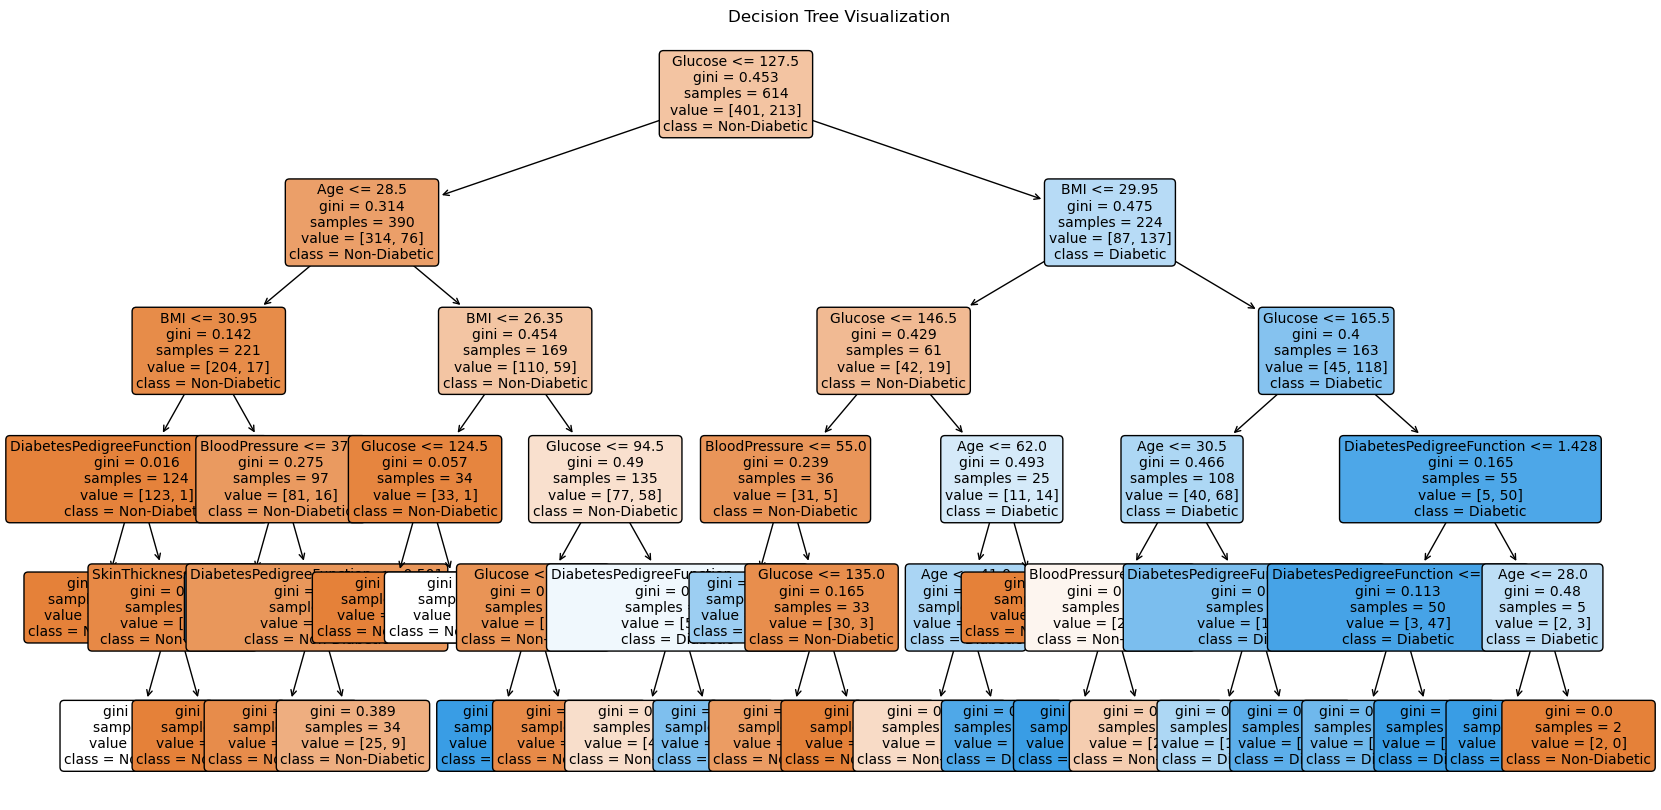

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('diabetes.csv')
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming df is your preprocessed DataFrame
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid for optimization
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for cross-validation and hyperparameter tuning
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best decision tree model
best_dt_model = grid_search.best_estimator_

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt_model, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()
